In [1]:
import pandas as pd
from readresults.readres_mvpa import merge_results, parse_roi_info, exclude_participants, fill_in_nvoxels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mne.stats import permutation_cluster_1samp_test
import pingouin as pg
from plotting.plot import plot_by_nvoxels, get_tfce_stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Info coupling spheres

In [17]:
res_list = ['../../../MVPA_results/results_infocouplspheres.csv',
            '../../../MVPA_results/results_infocouplspheres_moreradii.csv']
results = merge_results(res_list)

In [18]:
results = parse_roi_info(results)
results = exclude_participants(results)
#results = fill_in_nvoxels(results)

In [19]:
results.radius.unique()

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [20]:
meanres = results.groupby(['subject', 'radius']).mean().reset_index()

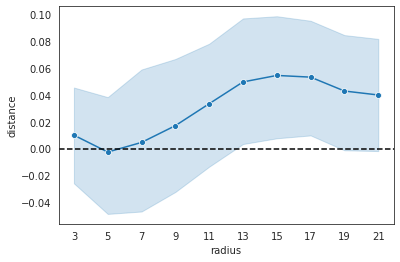

In [21]:
sns.set_style('white')
p = sns.lineplot(data=meanres, x='radius', y='distance', ci=95, marker='o')
p.set_xticks(meanres.radius.unique())
p.set_xticklabels(meanres.radius.unique())
plt.axhline(0.0, linestyle='--', color='k')
plt.savefig('results_plots/ba19sphere.pdf')

In [25]:
meanres = meanres.rename(columns={'radius': 'nvoxels'})

In [26]:
_, _, tfce_pvals_spheres, _ = get_tfce_stats(meanres,
                              measure='distance', n_perms=10000)

stat_fun(H1): min=-0.114774 max=2.339805
Running initial clustering
Using 234 thresholds from 0.00 to 2.33 for TFCE computation (h_power=2.00, e_power=0.50)
Found 10 clusters
Permuting 9999 times...


  0%|          |  : 0/9999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [34]:
pg.ttest(meanres[meanres['nvoxels']==17].distance,
         0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.259624,29,two-sided,0.031532,"[0.01, 0.1]",0.412549,1.734,0.58881


## N. voxels on BA19/37

In [3]:
res_list = ['../../../MVPA_results/results_main_nothresh.csv']
results = merge_results(res_list)
results = parse_roi_info(results)
results = exclude_participants(results)
results = results.groupby(['subject', 'roi', 'hemi', 'nvoxels']).mean().reset_index()

In [4]:
bothrois_avg = results.groupby(['subject', 'roi']).mean().reset_index()

In [6]:
aov = pg.ttest(bothrois_avg[bothrois_avg['roi']=='ba-17-18'].distance,
               bothrois_avg[bothrois_avg['roi']=='ba-19-37'].distance,
               paired=True)
aov.round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.1241,29,two-sided,0.9021,"[-0.06, 0.07]",0.0237,0.196,0.0518


In [8]:
pg.ttest(bothrois_avg.groupby(['subject']).mean().reset_index().distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.432896,29,two-sided,0.021378,"[0.01, 0.12]",0.444184,2.384,0.652403


In [3]:
res_1718 = results[results['roi']=='ba-17-18']
res_1937 = results[results['roi']=='ba-19-37']

In [14]:
res_1718.distance.agg(['mean', 'sem'])

mean    0.064601
sem     0.004162
Name: distance, dtype: float64

In [4]:
meanres = res_1718.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.724192,29,two-sided,0.095319,"[-0.01, 0.14]",0.314793,0.724,0.384967


In [15]:
res_1937.distance.agg(['mean', 'sem'])

mean    0.060687
sem     0.002518
Name: distance, dtype: float64

In [5]:
meanres = res_1937.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.96224,29,two-sided,0.006041,"[0.02, 0.1]",0.540829,6.918,0.816716


In [6]:
#_, _, tfce_pvals_1937, _ = get_tfce_stats(res_1937.groupby(['subject','nvoxels']).mean().reset_index(),
#                                          measure='distance', n_perms=10000)
tfce_pvals_1937 = [0.7638, 0.5547, 0.3078, 0.1942, 0.1365, 0.1289, 0.1324, 0.0976,
       0.082 , 0.0609, 0.0976, 0.0871, 0.0957, 0.085 , 0.0792, 0.1026,
       0.085 , 0.085 , 0.0754, 0.0792, 0.0929, 0.0667, 0.0555, 0.0555,
       0.06  , 0.0546, 0.047 , 0.0493, 0.0454, 0.0416, 0.0374, 0.0319,
       0.0241, 0.0222, 0.0241, 0.0215, 0.0242, 0.0222, 0.0215, 0.0205,
       0.0171, 0.018 , 0.0154, 0.0144, 0.0148, 0.0128, 0.0128, 0.0119,
       0.0101, 0.0101, 0.0099, 0.0108, 0.0095, 0.0119, 0.0125, 0.0123,
       0.0111, 0.0111, 0.0125, 0.014]

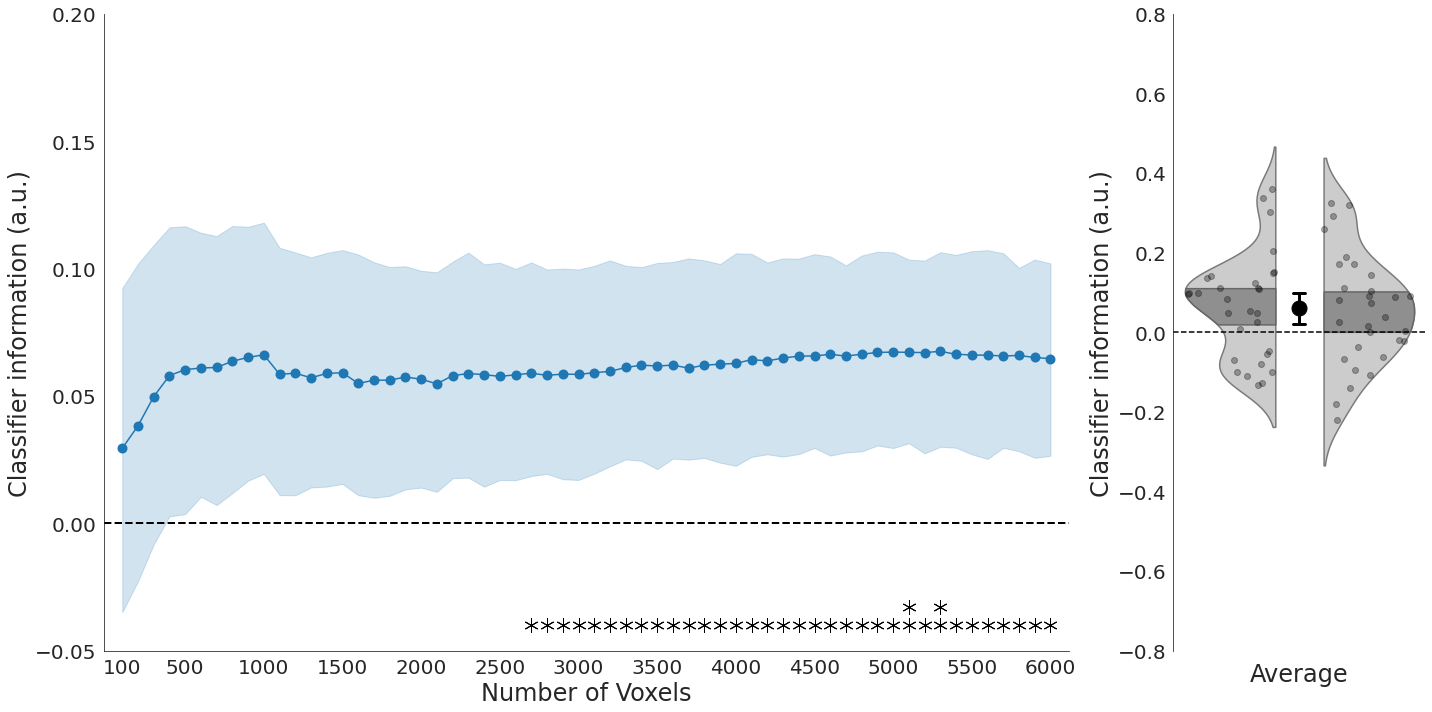

In [10]:
plot_by_nvoxels(res_1937, right_part=True, tfce_pvals=tfce_pvals_1937)
plt.savefig('results_plots/vistemp_1937_nvox.pdf')

In [8]:
#_, _, tfce_pvals_1718, _ = get_tfce_stats(res_1718.groupby(['subject','nvoxels']).mean().reset_index(),
#                                          measure='distance', n_perms=10000)
tfce_pvals_1718 = [0.5991, 0.5221, 0.574 , 0.5605, 0.4452, 0.4392, 0.3028, 0.2931,
           0.3028, 0.3211, 0.3167, 0.3115, 0.3676, 0.3989, 0.3519, 0.3115,
           0.3253, 0.3253, 0.3073, 0.3167, 0.3167, 0.3309, 0.3253, 0.3115,
           0.2877, 0.2655, 0.2377, 0.2297, 0.2407, 0.2297, 0.2262, 0.2181,
           0.2081, 0.2081, 0.2147, 0.2181, 0.2114, 0.204 , 0.198 , 0.1851,
           0.1753, 0.1753, 0.1753, 0.1753, 0.1727, 0.1727, 0.1698, 0.1698,
           0.1663, 0.1663, 0.1663, 0.1663, 0.1663, 0.1633, 0.1633, 0.1633,
           0.1633, 0.1633, 0.1633, 0.1633]

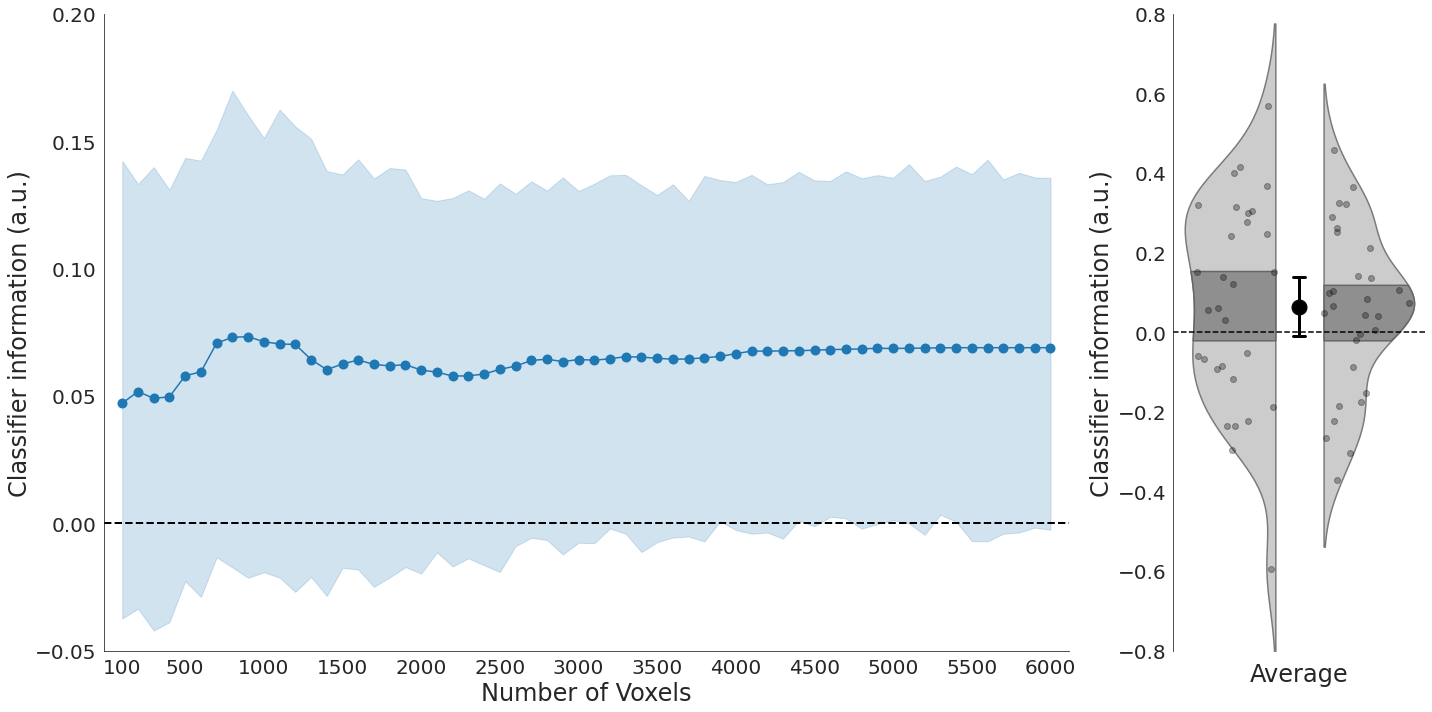

In [11]:
plot_by_nvoxels(res_1718, right_part=True, tfce_pvals=tfce_pvals_1718)
plt.savefig('results_plots/vistemp_1718_nvox.pdf')

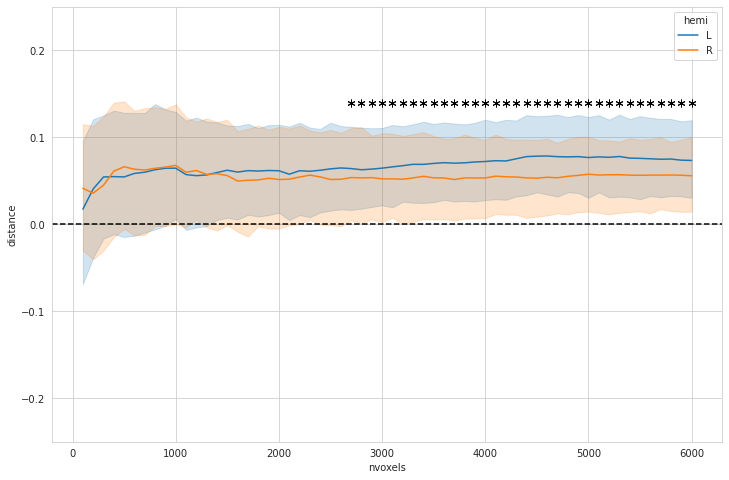

In [31]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('white')
sns.lineplot(data=meanres[meanres['roi']=='ba-19-37'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [24]:
subxvoxels = df_to_array_tfce(meanres[meanres['roi']=='ba-17-18'].groupby(['subject', 'nvoxels']).mean().reset_index(),
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

stat_fun(H1): min=1.049460 max=1.931735
Running initial clustering
Using 194 thresholds from 0.00 to 1.93 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [25]:
tfce_pvals

array([0.604, 0.527, 0.585, 0.572, 0.46 , 0.456, 0.306, 0.298, 0.306,
       0.33 , 0.326, 0.32 , 0.379, 0.409, 0.357, 0.32 , 0.333, 0.333,
       0.311, 0.326, 0.326, 0.34 , 0.333, 0.32 , 0.292, 0.266, 0.238,
       0.233, 0.24 , 0.233, 0.225, 0.219, 0.206, 0.206, 0.215, 0.219,
       0.213, 0.205, 0.196, 0.189, 0.18 , 0.18 , 0.18 , 0.18 , 0.176,
       0.176, 0.169, 0.169, 0.168, 0.168, 0.168, 0.168, 0.168, 0.167,
       0.167, 0.167, 0.167, 0.167, 0.167, 0.167])

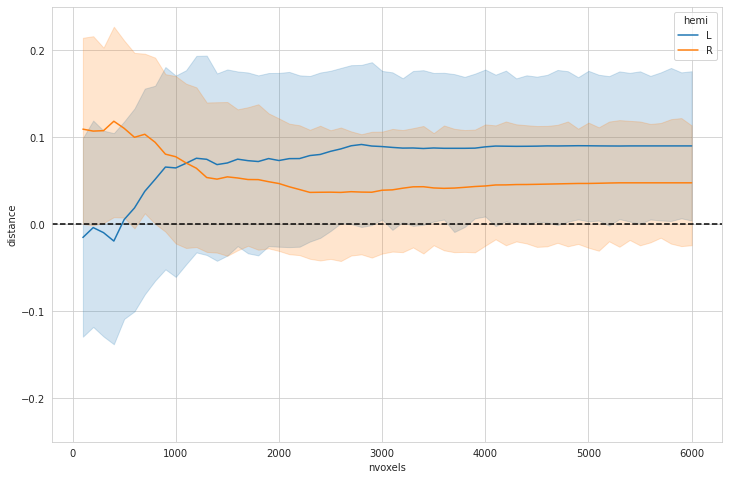

In [28]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-17-18'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [37]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='R')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

stat_fun(H1): min=0.645831 max=2.122324
Running initial clustering
Using 213 thresholds from 0.00 to 2.12 for TFCE computation (h_power=2.00, e_power=0.50)
Found 10 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [38]:
tfce_pvals

array([0.819, 0.61 , 0.458, 0.297, 0.294, 0.236, 0.138, 0.091, 0.149,
       0.105])

In [39]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='L')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

stat_fun(H1): min=0.211648 max=1.931702
Running initial clustering
Using 194 thresholds from 0.00 to 1.93 for TFCE computation (h_power=2.00, e_power=0.50)
Found 10 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [40]:
tfce_pvals

array([0.998, 0.324, 0.23 , 0.258, 0.298, 0.173, 0.223, 0.195, 0.163,
       0.157])

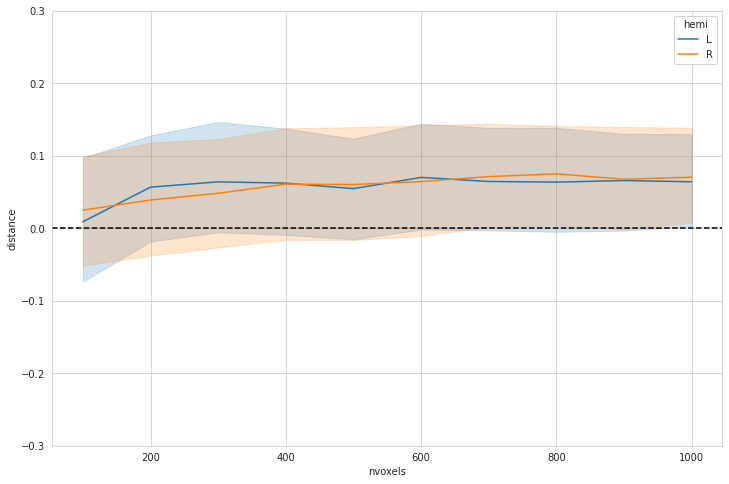

In [56]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.3, 0.3])
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-19'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 

## Info coupling ROI

In [4]:
res_list = ['../../../MVPA_results/infocoupling_sphere']
infocouplroires = merge_results(res_list)
infocouplroires = exclude_participants(infocouplroires)

In [6]:
infocouplroires.distance.mean()

-0.014318684879621405

## Full ROIs

In [44]:
res_list = ['../../../MVPA_results/results_main_fullrois.csv']
fullroiresults = merge_results(res_list)
fullroiresults = parse_roi_info(fullroiresults)
fullroiresults = exclude_participants(fullroiresults)

In [45]:
fullroi_meanres = fullroiresults.groupby(['roi', 'subject', 'hemi']).mean().reset_index()

<AxesSubplot:xlabel='roi', ylabel='distance'>

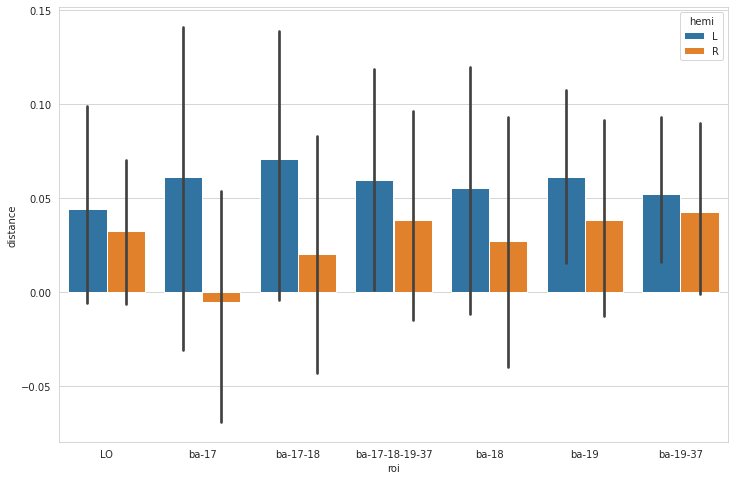

In [48]:
plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=fullroi_meanres, 
            x='roi', y='distance',
            hue='hemi', ci=95)

In [60]:
x=float('-inf')

In [61]:
x==float('-inf')

True

In [10]:
MVPAres.groupby(['roi', 'testmodel']).mean()

correct    output   rawdistance  distance  runno  \
roi        testmodel                                                      
LO_L       3          0.562500  0.500000 -5.203555e-02  0.303416    4.5   
           6          0.591667  0.525000 -7.715745e-03  0.126060    2.0   
LO_R       3          0.562500  0.500000  2.873767e-02  0.290023    4.5   
           6          0.500000  0.466667  2.713797e-07  0.034675    2.0   
ba-17-18_L 3          0.843750  0.468750 -5.531191e-02  0.602125    4.5   
           6          0.716667  0.450000  1.302044e-07  0.431098    2.0   
ba-17-18_R 3          0.812500  0.500000  6.353730e-02  0.679119    4.5   
           6          0.683333  0.533333  1.264045e-07  0.384545    2.0   

                      trainmodel  
roi        testmodel              
LO_L       3                 6.0  
           6                 3.0  
LO_R       3                 6.0  
           6                 3.0  
ba-17-18_L 3                 6.0  
           6                 3.0  
ba-17-18_R 3                 6.0  
           6                 3.0